# Compute synthetic photometry for any SVO filters

Obtain synthetic photometry for any photometric filters in [SVO](http://svo2.cab.inta-csic.es/theory/fps/)
and visualize the results.

In [1]:
import seda
import os
from astropy.io import fits, ascii
import matplotlib.pyplot as plt


    SEDA v0.5.6.dev3 package imported


Read the spectrum of interest.

As an example here, let's read the near-infrared IRTF/SpeX spectrum for the T8 (~750 K) brown dwarf 2MASS J04151954-0935066 in [Burgasser et al. (2004)](https://ui.adsabs.harvard.edu/abs/2004AJ....127.2856B/abstract):

In [2]:
# path to the seda package
path_seda = os.path.dirname(os.path.dirname(seda.__file__))

# SpeX spectrum
SpeX_name = path_seda+'/docs/notebooks/data/0415-0935_IRTF_SpeX.dat'
SpeX = ascii.read(SpeX_name)
wl_SpeX = SpeX['wl(um)'] # um 
flux_SpeX = SpeX['flux(erg/s/cm2/A)'] # erg/s/cm2/A
eflux_SpeX = SpeX['eflux(erg/s/cm2/A)'] # erg/s/cm2/A

Obtain synthetic photometry for photometric filters with spectral coverage using [SVO filter IDs](http://svo2.cab.inta-csic.es/theory/fps/).

In [3]:
# define filter IDs
filters = (['PAN-STARRS/PS1.y', 
            'UKIRT/UKIDSS.Y', 'UKIRT/UKIDSS.J', 'UKIRT/UKIDSS.H', 'UKIRT/UKIDSS.K',
            '2MASS/2MASS.J', '2MASS/2MASS.H', '2MASS/2MASS.Ks']) # filters of interest

# obtain synthetic photometry
out = seda.synthetic_photometry.synthetic_photometry(wl=wl_SpeX, 
                                                     flux=flux_SpeX, 
                                                     eflux=eflux_SpeX, 
                                                     flux_unit='erg/s/cm2/A', 
                                                     filters=filters)

   Caveat: No full spectral coverage for PAN-STARRS/PS1.y, so the synthetic photometry is a lower limit
      approx. 99.99% of the filter transmission is covered by the data


Plot and save the input spectrum with the computed synthetic fluxes

*Note that the PAN-STARRS/PS1.y flux is properly indicated as a lower limit.*

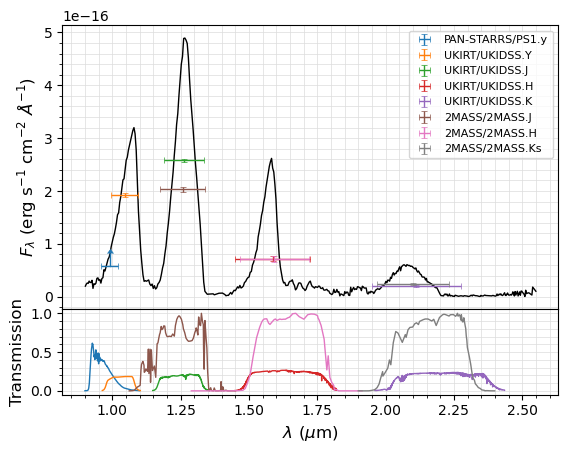

In [6]:
fig, axs = seda.plots.plot_synthetic_photometry(out, save=True)

Plot and customize the plot generated above

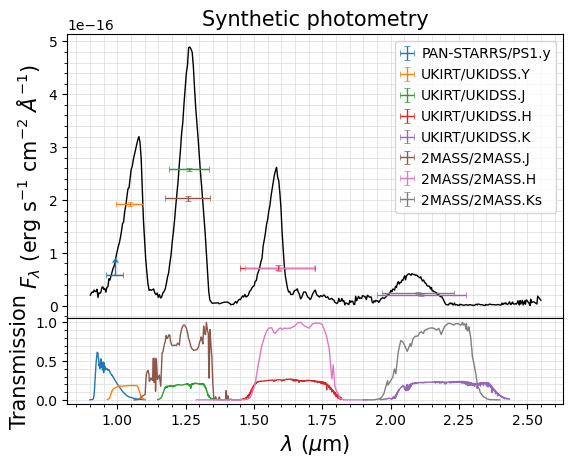

In [7]:
fig, axs = seda.plots.plot_synthetic_photometry(out)

# improve legend
axs[0].legend(prop={'size': 10.0}, handlelength=1, handletextpad=0.5, labelspacing=0.5)

# set plot title
axs[0].set_title('Synthetic photometry', fontsize=15)

# increase font size of axes
axs[0].yaxis.label.set_size(15)
axs[1].yaxis.label.set_size(15)
axs[1].xaxis.label.set_size(15)

# export plot as PDF
plt.savefig(f'synthetic_photometry.pdf', bbox_inches='tight') # export plot as PDF
plt.show()